### Load Necessary Libraries

In [3]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 

### Load Palm Oil Data

In [4]:
df = pd.read_csv('palm_ffb.csv')
df.head(5)

,Date,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
0,01.01.2008,616.4,25.306452,21.3,32.2,184.4,25,777778.3951,1.62
1,01.02.2008,568.9,26.165517,20.9,35.1,140.2,23,767988.2759,1.45
2,01.03.2008,577.6,25.448387,21.3,32.9,280.4,25,783951.9231,1.56
3,01.04.2008,581.1,26.903333,20.6,34.8,173.3,25,788987.0504,1.39
4,01.05.2008,545.4,27.241935,20.9,35.0,140.6,25,813659.7222,1.44


Distribution table of dataframe

In [5]:
df.describe()

,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,527.646923,26.849918,21.379231,33.851538,188.980769,24.753846,793404.491565,1.602231
std,57.367844,0.651413,0.688971,1.079638,80.237210,1.239289,34440.893854,0.281751
min,380.700000,25.158065,18.900000,31.100000,2.000000,21.000000,683431.944400,1.080000
25%,488.625000,26.442285,21.000000,33.100000,140.300000,24.000000,768966.949100,1.390000
50%,538.300000,26.930645,21.500000,33.900000,182.150000,25.000000,790036.158050,1.585000
75%,571.025000,27.270726,21.800000,34.600000,226.100000,26.000000,821989.235250,1.807500
max,647.300000,28.580000,22.600000,36.000000,496.100000,27.000000,882254.225400,2.270000


To show the distribution of each factors and yield

<Figure size 1200x1400 with 0 Axes>

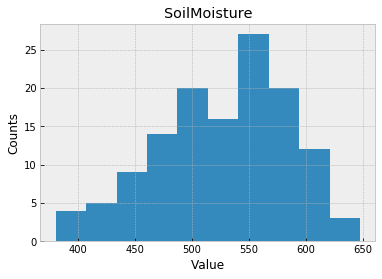

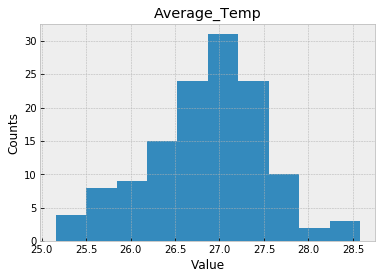

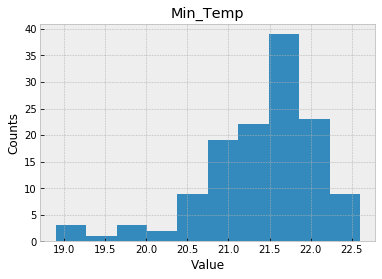

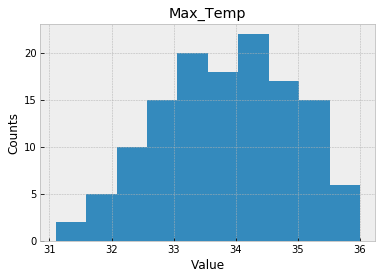

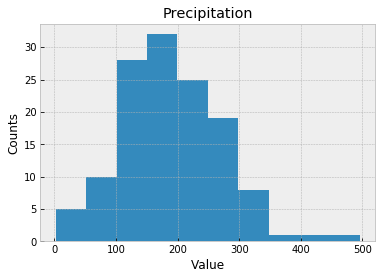

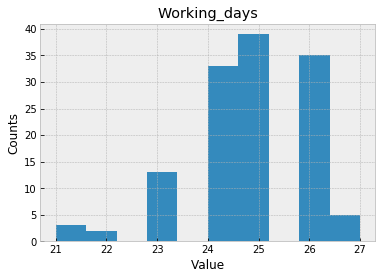

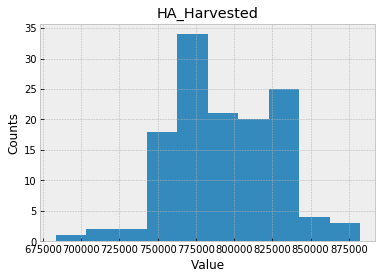

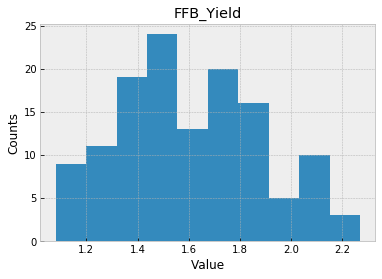

In [6]:
plt.figure(figsize=(6,7), dpi=200)

plt.style.use('bmh')

for x in df.columns[1:]:   # Slice 1 index which is Data column
    plt.figure()
    plt.hist(df[x])
    plt.title(x)
    plt.xlabel('Value')
    plt.ylabel('Counts')

plt.show()

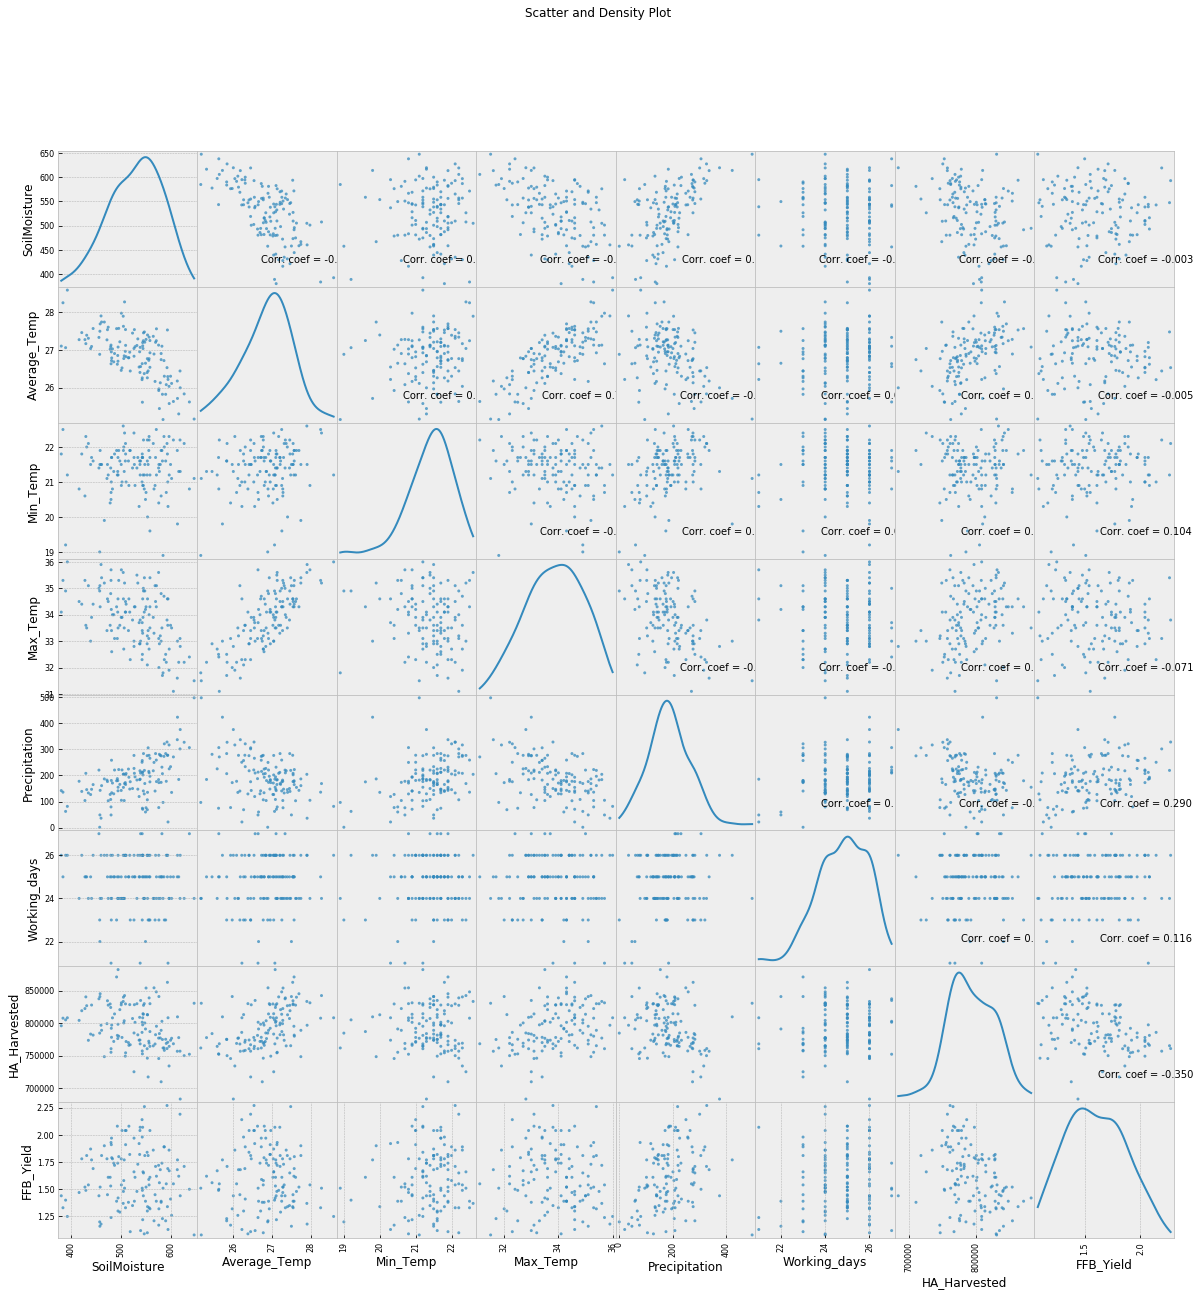

In [8]:
df = df.select_dtypes(include =[np.number])
df = df.dropna('columns')
df = df[[col for col in df if df[col].nunique() > 1]] 
columnNames = list(df)
if len(columnNames) > 10:
    columnNames = columnNames[:10]
df = df[columnNames]
ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[20, 20], diagonal='kde')
corrs = df.corr().values
for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
    ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=10)
plt.suptitle('Scatter and Density Plot')
plt.show()